In [1]:
import numpy as np
import argparse
import cv2
from imutils.video import VideoStream
from imutils.video import FPS
import time
import imutils
from scipy.spatial import distance
from typing import NamedTuple
import collections
from matplotlib import pyplot as plt
import os
from collections import OrderedDict 
import math

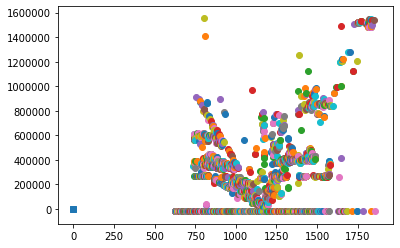

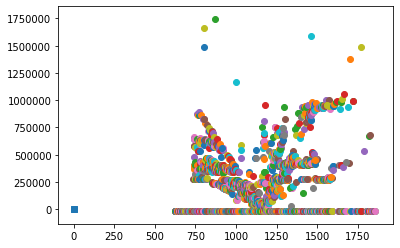

KeyboardInterrupt: 

In [13]:
lft_folder = 'left'
rt_folder = 'right'

video_name = 'video.avi'

landmarks = {} 


left_img = [img for img in os.listdir(lft_folder) if img.endswith(".png")]
right_img = [img for img in os.listdir(rt_folder) if img.endswith(".png")]

stereo = cv2.StereoBM_create(numDisparities=112, blockSize=15)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

oldimg = []
keypoints_2 = None
descriptors_2 = None
for image in range(len(left_img)):
    lftFrame = cv2.imread(os.path.join(lft_folder, left_img[image]))
    rtFrame = cv2.imread(os.path.join(rt_folder, right_img[image]))
    
    left = cv2.cvtColor(lftFrame, cv2.COLOR_BGR2GRAY) 
    right = cv2.cvtColor(rtFrame, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(left,None)
    newimg=cv2.drawKeypoints(left,keypoints_1,lftFrame)
    
    

    disparity = stereo.compute(left, right).astype(np.float32)

    h, w = disparity.shape
    f = 0.8*w                          # guess for focal length
    Q = np.float32([[1, 0,  0, w / 2],
                    [0, -1,  0,  h / 2],  # turn points 180 deg around x-axis,
                    [0, 0, f,  0],  # so that y-axis looks up
                    [0, 0,  0,  1]])
    
    real_points = cv2.reprojectImageTo3D(disparity, Q)
    
    if len(landmarks) < 1:
        for x in range(len(keypoints_1)):
            landmarks[x] = keypoints_1[x].pt
            
    else:
                    
        for x in range(len(keypoints_1)):
            pos = keypoints_1[x].pt
            closest = 9999
            mathched = 0
            for ln in landmarks:
                distanceToLandmark = math.sqrt(math.pow(pos[0]-landmarks[ln][0],2) + math.pow(pos[1]-landmarks[ln][1], 2))
                if distanceToLandmark < closest:
                    closest = distanceToLandmark
                    mathched = ln
                    
            landmarks[mathched] = pos
                    
    
    fig,ax = plt.subplots() #create figure and axes

    ax.scatter(0, 0,marker='s')
    for i in landmarks:
        xyz = real_points[int(landmarks[i][1]),int(landmarks[i][0])]
        if i == 36:
            ax.scatter(xyz[0], xyz[2], marker='s')
        else:
            ax.scatter(xyz[0], xyz[2])
    
    plt.show()
#     cv2.imshow('Disparity', newimg)
#     key = cv2.waitKey(1) & 0xFF
#     # if the `q` key was pressed, break from the loop
#     if key == ord("q"):
#         break

cv2.destroyAllWindows()
